![alt text](https://i.imgur.com/0cvnBXi.png)


In [0]:
%tensorflow_version 1.x 

#Train a simple deep CNN on the CIFAR10 small images dataset
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, ZeroPadding2D
import os

batch_size = 128
num_classes = 10
epochs = 30
data_augmentation = True
num_predictions = 20


# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Conv2D(512, (1, 1), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Conv2D(num_classes, (1, 1), padding='same'))
model.add(Flatten())
model.add(Dense(num_classes))
model.add(Activation('softmax'))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    
    # initiate optimizers

    adam_opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
    ams_opt = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

    # Let's train the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=adam_opt,
                  metrics=['accuracy'])
    model.save_weights('model.h5')

    # Fit the model on the batches generated by datagen.flow().
    history_adam = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)


TensorFlow 1.x selected.


Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Using real-time data augmentation.

Epoch 1/30
391/391 [==============================] - 407s 1s/step - loss: 1.8787 - accuracy: 0.2727 - val_loss: 1.4578 - val_accuracy: 0.4557
Epoch 2/30
391/391 [==============================] - 406s 1s/step - loss: 1.4546 - accuracy: 0.4634 - val_loss: 1.2000 - val_accuracy: 0.5637
Epoch 3/30
391/391 [==============================] - 403s 1s/step - loss: 1.2519 - accuracy: 0.5504 - val_loss: 1.0386 - val_accuracy: 0.6276
Epoch 4/30
391/391 [==============================] - 403s 1s/step - loss: 1.1214 - accuracy: 0.5999 - val_loss: 0.9321 - val_accuracy: 0.6685
Epoch 5/30
391/391 [==============================] - 410s 1s/step - loss: 1.0265 - accuracy: 0.6394 - val_loss: 0.8683 - val_accuracy: 0.6936
Epoch 6/30
391/391 [=======

In [0]:
    model.load_weights('model.h5')
    model.compile(loss='categorical_crossentropy',
                  optimizer=ams_opt,
                  metrics=['accuracy'])
    history_ams = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)

Epoch 1/30
391/391 [==============================] - 383s 980ms/step - loss: 1.8102 - accuracy: 0.3095 - val_loss: 1.4680 - val_accuracy: 0.4492
Epoch 2/30
391/391 [==============================] - 393s 1s/step - loss: 1.4391 - accuracy: 0.4717 - val_loss: 1.3638 - val_accuracy: 0.4990
Epoch 3/30
391/391 [==============================] - 401s 1s/step - loss: 1.2514 - accuracy: 0.5498 - val_loss: 1.1741 - val_accuracy: 0.5803
Epoch 4/30
391/391 [==============================] - 387s 990ms/step - loss: 1.1252 - accuracy: 0.5968 - val_loss: 0.9402 - val_accuracy: 0.6666
Epoch 5/30
391/391 [==============================] - 392s 1s/step - loss: 1.0258 - accuracy: 0.6346 - val_loss: 0.9384 - val_accuracy: 0.6695
Epoch 6/30
391/391 [==============================] - 387s 990ms/step - loss: 0.9677 - accuracy: 0.6589 - val_loss: 0.8876 - val_accuracy: 0.6883
Epoch 7/30
391/391 [==============================] - 388s 991ms/step - loss: 0.9079 - accuracy: 0.6814 - val_loss: 0.8476 - val_accu

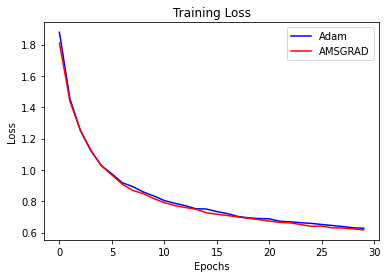

In [0]:
import matplotlib.pyplot as pl1

pl1.plot(history_adam.history['loss'],label='Adam',color=(0,0,1))
pl1.plot(history_ams.history['loss'],label='AMSGRAD',color=(1,0,0))
pl1.title('Training Loss')
pl1.ylabel('Loss')
pl1.xlabel('Epochs')
pl1.legend()
pl1.show()


Có thể thấy AMSGrad hội tụ nhanh hơn ADAM trong phần lớn quá trình huấn luyện, tuy nhiên khi kết thúc huấn luyện cả hai thuật toán đều hội tụ về cùng một mất mát tương tự nhau. Thêm vào đó, tại một số lần lặp gần cuối, ADAM hội tụ nhanh hơn cả AMSGRAD. Những điều này không mang nhiều ý nghĩa vì đây chỉ là mất mát khi huấn luyện. Tuy nhiên, chúng lại khác với những kết luận được đưa ra trong bài báo 'On The Convergence Of ADAM And Beyond' khi huấn luyện với mô hình cifarnet, trong đó các tác giả kết luận răng train loss của AMSGRAD thấp hơn nhiều so với ADAM.

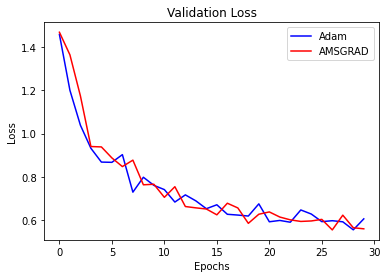

In [0]:
import matplotlib.pyplot as pl2

pl2.plot(history_adam.history['val_loss'],label='Adam',color=(0,0,1))
pl2.plot(history_ams.history['val_loss'],label='AMSGRAD',color=(1,0,0))
pl2.title('Validation Loss')
pl2.ylabel('Loss')
pl2.xlabel('Epochs')
pl2.legend()
pl2.show()


Validation loss lại cho ra kết quả khác xa Train loss. Có thể thấy, trong những lần lặp đầu, ADAM cho validation loss thấp hơn so với AMSGRAD. Ở những lần lặp sau đó, hai thuật toán liên tục đổi vị trí cho nhau khi so sánh giá trị validation loss.

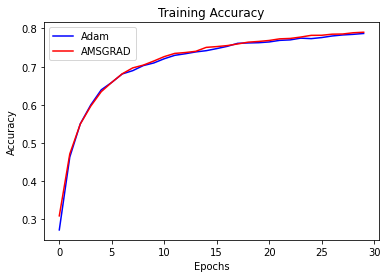

In [0]:
import matplotlib.pyplot as pl3

pl3.plot(history_adam.history['accuracy'],label='Adam',color=(0,0,1))
pl3.plot(history_ams.history['accuracy'],label='AMSGRAD',color=(1,0,0))
pl3.title('Training Accuracy')
pl3.ylabel('Accuracy')
pl3.xlabel('Epochs')
pl3.legend()
pl3.show()


Training accuracy khá tương đồng với Training loss. AMSGRAD hội tụ nhanh hơn ADAM nhưng khi kết thúc quá trình huấn luyện, cả hai thuật toán đều đạt được độ chính xác tương đương nhau.

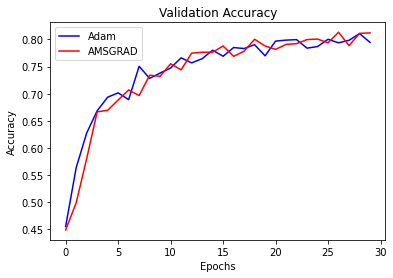

In [0]:
import matplotlib.pyplot as pl4

pl4.plot(history_adam.history['val_accuracy'],label='Adam',color=(0,0,1))
pl4.plot(history_ams.history['val_accuracy'],label='AMSGRAD',color=(1,0,0))
pl4.title('Validation Accuracy')
pl4.ylabel('Accuracy')
pl4.xlabel('Epochs')
pl4.legend()
pl4.show()

Đối với validation accuracy, thuật toán ADAM cho độ chính xác cao hơn so với AMSGRAD trong phần lớn quá trình nhưng không ổn định. Và cũng như validation loss, độ chính xác của hai thuật toán này liên tục đổi ngôi cho nhau trong những lần lặp cuối.

Kết luận:
Trong bài báo 'On The Convergence Of ADAM And Beyond', các tác giả kết luận rằng AMSGRAD cho hiệu năng **tốt hơn nhiều** so với ADAM khi so sánh training loss và accuracy. Tuy nhiên, những kết quả của thí nghiệm ở trên lại không cho thấy điều tương tự. ADAM mang lại hiệu năng tương đương và tại một số điểm còn tốt hơn AMSGRAD.